In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_iris = pd.read_csv('/content/drive/MyDrive/2024_01/Aprendizado de Máquina/iris.csv')

In [ ]:
X = df_iris[['PetalLength[cm]', 'PetalWidth[cm]']].values
y = df_iris['Species'].values


label_dict = {'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2}

df_iris['ClassLabel'] = df_iris['Species'].map(label_dict)

y = df_iris['ClassLabel'].values
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import numpy as np
indices = np.arange(y.shape[0])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [ ]:
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [ ]:
X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]
X_train, y_train = X_shuffled[:105], y_shuffled[:105]
X_test, y_test = X_shuffled[105:], y_shuffled[105:]

In [ ]:
import numpy as np

class NearestCentroidClassifier:
    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.centroids = {}

        # Calcula o centróide para cada classe
        for label in np.unique(y_train):
            self.centroids[label] = np.mean(X_train[y_train == label], axis=0)

    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        # Calcula as distâncias para todos os centróides e encontra o mais próximo
        distances = [np.linalg.norm(x - centroid) for centroid in self.centroids.values()]
        nearest_label = min(self.centroids, key=lambda label: distances[label])

        return nearest_label

# Cria uma instância do classificador
classifier = NearestCentroidClassifier()

# Treina o classificador
classifier.fit(X_train, y_train)

# Faz previsões para os dados de teste
y_pred_test = classifier.predict(X_test)

# Calcula a acurácia do classificador nos dados de teste
accuracy_test = np.mean(y_pred_test == y_test) * 100
print('Acurácia Teste: %.2f%%' % accuracy_test)

# Faz previsões para os dados de treinamento
y_pred_train = classifier.predict(X_train)

# Calcula a acurácia do classificador nos dados de treinamento
accuracy_train = np.mean(y_pred_train == y_train) * 100
print('Acurácia Treino: %.2f%%' % accuracy_train)


Acurácia Teste: 93.33%
Acurácia Treino: 98.10%


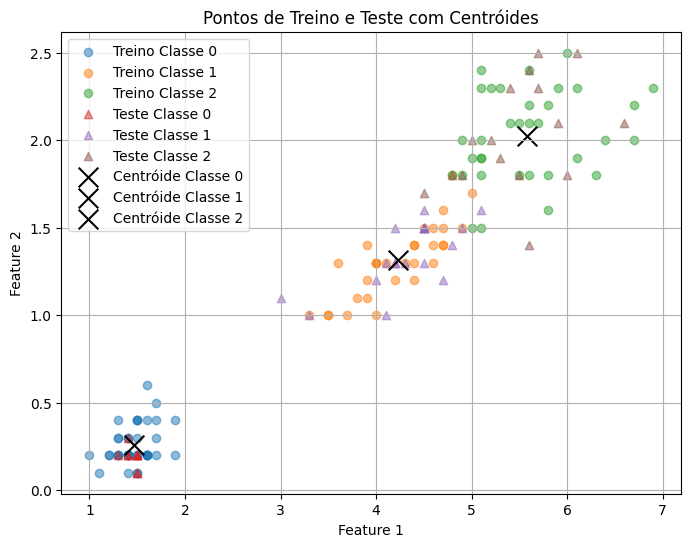

In [ ]:
# Plotar os pontos de treino e teste
plt.figure(figsize=(8, 6))

# Plotar pontos de treino
for label in np.unique(y_train):
    plt.scatter(X_train[y_train == label][:, 0], X_train[y_train == label][:, 1], marker='o', label=f'Treino Classe {label}', alpha=0.5)

# Plotar pontos de teste
for label in np.unique(y_test):
    plt.scatter(X_test[y_test == label][:, 0], X_test[y_test == label][:, 1], marker='^', label=f'Teste Classe {label}', alpha=0.5)

# Plotar centróides
for label, centroid in classifier.centroids.items():
    plt.scatter(centroid[0], centroid[1], marker='x', color='black', s=200, label=f'Centróide Classe {label}')

plt.title('Pontos de Treino e Teste com Centróides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()